In [1]:
import sys
sys.path.append('../')
from astroquery.simbad import Simbad
from astropy.table import join
import astropy.units as u

from source_names_dict import source_names_dict, source_names_readable

In [2]:
source_names = list(source_names_dict.keys())
gal_names = list(source_names_dict.values())
source_names_r = list(source_names_readable.values())
print(len(source_names), len(gal_names), len(source_names_r))

40 40 40


In [3]:
tab1 = Simbad.query_objects(source_names)
tab1['source_name'] = source_names
tab1['source_name_readable'] = source_names_r
tab1

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID,source_name,source_name_readable
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32,str29,str18
[FWB2009] HLX-1,01 10 28.30,-46 04 22.3,6,6,300.000,300.000,90,C,X,2010ApJ...712L.107W,1,ESO_243-49_HLX-1,ESO 243-49 HLX-1
RX J0957.9+6903,09 57 53.290,+69 03 48.20,7,7,54.000,49.000,0,C,O,2009ApJS..182..543A,2,NAME_Holmberg_IX_X-1,Holmberg IX X-1
[SST2011] J081929.00+704219.3,08 19 28.99,+70 42 19.4,6,6,700.000,700.000,0,C,X,2014MNRAS.442.1054H,3,Holmberg_II_X-1,Holmberg II X-1
CXOM31 J004253.1+411422,00 42 53.15,+41 14 22.9,6,6,--,--,0,D,X,2012A&A...538A..49K,4,M31_ULX-1,M31 ULX-1
ChASeM33 J013350.89+303936.6,01 33 50.8965,+30 39 36.630,14,14,0.283,0.238,90,A,O,2020yCat.1350....0G,5,[LM2005]_NGC_598_ULX1,M33 ULX-1
RX J133001+47137,13 30 01.01,+47 13 43.9,6,6,700.000,700.000,0,C,X,2014MNRAS.442.1054H,6,RX_J133001+47137,M51 ULX-7
[FK2005] 7,09 55 32.95,+69 00 33.6,6,6,1000.000,1000.000,0,D,X,2014MNRAS.442.1054H,7,[LM2005]_NGC_3031_ULX1,M81 X-6
[KCF2005] M82 G,09 55 51.040,+69 40 45.49,7,7,--,--,0,D,,2006ApJ...646..174K,8,M82_X-2,M82 X-2


In [4]:
Simbad.add_votable_fields('distance')

In [5]:
tab = Simbad.query_objects(gal_names)
tab['source_name'] = source_names


In [6]:
sub = tab['MAIN_ID', 'Distance_distance', 'Distance_unit', 'Distance_method', 'Distance_bibcode', 'source_name']
sub

MAIN_ID,Distance_distance,Distance_unit,Distance_method,Distance_bibcode,source_name
object,float64,str4,str8,str19,str29
ESO 243-49,115.3500,Mpc,,2016AJ....152...50T,ESO_243-49_HLX-1
UGC 5336,3.8500,Mpc,T-RDB,2017AJ....153....6K,NAME_Holmberg_IX_X-1
UGC 4305,3.4674,Mpc,redshift,2019A&A...631A..38L,Holmberg_II_X-1
M 31,0.8200,Mpc,T-RDB,2017AJ....153....6K,M31_ULX-1
M 33,0.9300,Mpc,T-RDB,2017AJ....153....6K,[LM2005]_NGC_598_ULX1
M 51,7.6000,Mpc,redshift,2011MNRAS.413..813C,RX_J133001+47137
M 81,3.5975,Mpc,redshift,2019A&A...631A..38L,[LM2005]_NGC_3031_ULX1
M 82,3.6141,Mpc,redshift,2019A&A...631A..38L,M82_X-2
NGC 1042,19.2000,Mpc,,2007ApJ...661..801O,[LM2005]_NGC_1042_ULX1


In [7]:
sub.sort('Distance_distance')
sub

MAIN_ID,Distance_distance,Distance_unit,Distance_method,Distance_bibcode,source_name
object,float64,str4,str8,str19,str29
IC 10,0.7943,Mpc,redshift,2019A&A...631A..38L,NAME_IC_10_X-1
M 31,0.8200,Mpc,T-RDB,2017AJ....153....6K,M31_ULX-1
M 33,0.9300,Mpc,T-RDB,2017AJ....153....6K,[LM2005]_NGC_598_ULX1
NGC 300,2.0230,Mpc,redshift,2019A&A...631A..38L,NAME_NGC_300_ULX1
NGC 55,2.1100,Mpc,T-RDB,2017AJ....153....6K,[SRW2006b]_NGC_55_ULX
UGC 4305,3.4674,Mpc,redshift,2019A&A...631A..38L,Holmberg_II_X-1
NGC 4945,3.4674,Mpc,redshift,2019A&A...631A..38L,[WMR2006]_NGC4945_XMM1
M 81,3.5975,Mpc,redshift,2019A&A...631A..38L,[LM2005]_NGC_3031_ULX1
M 82,3.6141,Mpc,redshift,2019A&A...631A..38L,M82_X-2


In [8]:
tab.columns

<TableColumns names=('MAIN_ID','RA','DEC','RA_PREC','DEC_PREC','COO_ERR_MAJA','COO_ERR_MINA','COO_ERR_ANGLE','COO_QUAL','COO_WAVELENGTH','COO_BIBCODE','Distance_distance','Distance_Q','Distance_unit','Distance_merr','Distance_perr','Distance_method','Distance_bibcode','SCRIPT_NUMBER_ID','source_name')>

In [9]:
tab_join = join(tab1,tab, keys='source_name')
tab_join

MAIN_ID_1,RA_1,DEC_1,RA_PREC_1,DEC_PREC_1,COO_ERR_MAJA_1,COO_ERR_MINA_1,COO_ERR_ANGLE_1,COO_QUAL_1,COO_WAVELENGTH_1,COO_BIBCODE_1,SCRIPT_NUMBER_ID_1,source_name,source_name_readable,MAIN_ID_2,RA_2,DEC_2,RA_PREC_2,DEC_PREC_2,COO_ERR_MAJA_2,COO_ERR_MINA_2,COO_ERR_ANGLE_2,COO_QUAL_2,COO_WAVELENGTH_2,COO_BIBCODE_2,Distance_distance,Distance_Q,Distance_unit,Distance_merr,Distance_perr,Distance_method,Distance_bibcode,SCRIPT_NUMBER_ID_2
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,,,,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,,,,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32,str29,str18,object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float64,str1,str4,float64,float64,str8,str19,int32
[FWB2009] HLX-1,01 10 28.30,-46 04 22.3,6,6,300.000,300.000,90,C,X,2010ApJ...712L.107W,1,ESO_243-49_HLX-1,ESO 243-49 HLX-1,ESO 243-49,01 10 27.7550,-46 04 27.356,14,14,2.641,3.174,90,C,O,2020yCat.1350....0G,115.3500,,Mpc,--,--,,2016AJ....152...50T,1
[SST2011] J081929.00+704219.3,08 19 28.99,+70 42 19.4,6,6,700.000,700.000,0,C,X,2014MNRAS.442.1054H,3,Holmberg_II_X-1,Holmberg II X-1,UGC 4305,08 19 04.9864,+70 43 13.086,14,14,0.291,0.447,90,A,O,2020yCat.1350....0G,3.4674,,Mpc,--,--,redshift,2019A&A...631A..38L,3
CXOM31 J004253.1+411422,00 42 53.15,+41 14 22.9,6,6,--,--,0,D,X,2012A&A...538A..49K,4,M31_ULX-1,M31 ULX-1,M 31,00 42 44.330,+41 16 07.50,7,7,--,--,0,C,I,2006AJ....131.1163S,0.8200,,Mpc,--,--,T-RDB,2017AJ....153....6K,4
[KCF2005] M82 G,09 55 51.040,+69 40 45.49,7,7,--,--,0,D,,2006ApJ...646..174K,8,M82_X-2,M82 X-2,M 82,09 55 52.430,+69 40 46.93,7,7,--,--,0,C,I,2006AJ....131.1163S,3.6141,,Mpc,--,--,redshift,2019A&A...631A..38L,8
RX J0957.9+6903,09 57 53.290,+69 03 48.20,7,7,54.000,49.000,0,C,O,2009ApJS..182..543A,2,NAME_Holmberg_IX_X-1,Holmberg IX X-1,UGC 5336,09 57 32.1,+69 02 46,5,5,--,--,0,D,O,2003A&A...412...45P,3.8500,,Mpc,--,--,T-RDB,2017AJ....153....6K,2
NAME IC 10 X-1,00 20 29.09,+59 16 51.9,6,6,2000.000,2000.000,90,D,X,2004ApJ...601L..67B,37,NAME_IC_10_X-1,IC10 X-1,IC 10,00 20 23.16,+59 17 34.7,6,6,10800.000,10800.000,90,D,,1999ApJS..125..409C,0.7943,,Mpc,--,--,redshift,2019A&A...631A..38L,37
[JRW2005b] 122,14 03 32.38,+54 21 03.0,6,6,700.000,700.000,0,C,X,2014MNRAS.442.1054H,40,NAME_M101-ULX1,M101 ULX-1,M 101,14 03 12.583,+54 20 55.50,7,7,--,--,0,C,I,2006AJ....131.1163S,7.1121,,Mpc,--,--,redshift,2019A&A...631A..38L,40
CXOU J133705.1-295207,13 37 05.13,-29 52 07.1,6,6,0.000,0.000,90,C,X,2014ApJS..212...21L,34,NAME_M83_ULX-1,M83 ULX-1,M 83,13 37 00.9192,-29 51 56.740,9,9,--,--,0,C,N,2006AJ....131.1163S,4.8978,,Mpc,--,--,redshift,2019A&A...631A..38L,34


In [10]:
sub_cols     = ['source_name_readable', 'RA_1', 'DEC_1', 'COO_WAVELENGTH_1', 'COO_BIBCODE_1', 'Distance_distance', 'Distance_unit', 'Distance_method', 'Distance_bibcode']
sub_cols_new = ['source_name',          'RA',   'DEC',   '$\lambda$',        'POS_REF',       'D',                 'D_unit',        'D_method',        'D_ref']
sub = tab_join[sub_cols]
sub.rename_columns(names=sub_cols, new_names=sub_cols_new)
sub['D'].unit = u.Mpc
sub.sort('D')
sub

source_name,RA,DEC,$\lambda$,POS_REF,D,D_unit,D_method,D_ref
,"""h:m:s""","""d:m:s""",,,Mpc,,,
str18,str13,str13,str1,object,float64,str4,str8,str19
IC10 X-1,00 20 29.09,+59 16 51.9,X,2004ApJ...601L..67B,0.7943,Mpc,redshift,2019A&A...631A..38L
M31 ULX-1,00 42 53.15,+41 14 22.9,X,2012A&A...538A..49K,0.8200,Mpc,T-RDB,2017AJ....153....6K
M33 ULX-1,01 33 50.8965,+30 39 36.630,O,2020yCat.1350....0G,0.9300,Mpc,T-RDB,2017AJ....153....6K
NGC300 ULX-1,00 55 04.86,-37 41 43.7,,2008yCat....1.2024B,2.0230,Mpc,redshift,2019A&A...631A..38L
NGC55 ULX,00 15 28.89,-39 13 18.8,X,2012ApJ...756...27L,2.1100,Mpc,T-RDB,2017AJ....153....6K
NGC4945 XMM-1,13 05 32.89,-49 27 34.1,,2004ApJS..154..519S,3.4674,Mpc,redshift,2019A&A...631A..38L
Holmberg II X-1,08 19 28.99,+70 42 19.4,X,2014MNRAS.442.1054H,3.4674,Mpc,redshift,2019A&A...631A..38L
M81 X-6,09 55 32.95,+69 00 33.6,X,2014MNRAS.442.1054H,3.5975,Mpc,redshift,2019A&A...631A..38L


In [11]:
sub.write('../tables/source_with_hosts.tex', format='latex', overwrite=True)

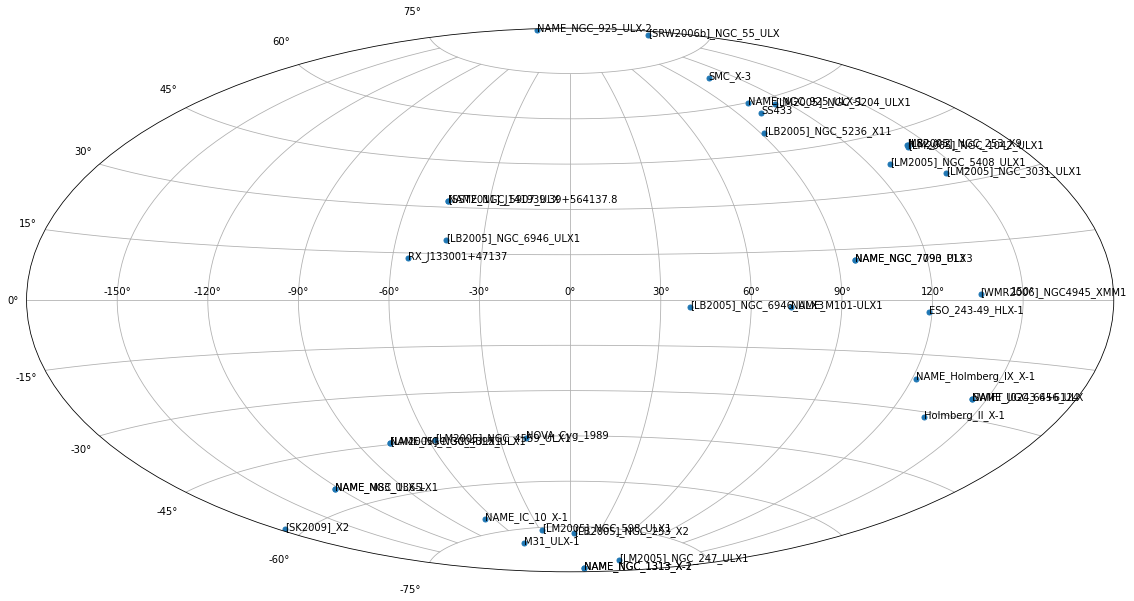

In [12]:
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np

ra_random = np.random.rand(100)*360.0 * u.degree
dec_random = (np.random.rand(100)*180.0-90.0) * u.degree




c = SkyCoord(sub['RA'], sub['DEC'], unit=(u.hourangle, u.deg), frame='icrs')
c = c.galactic
ra_rad = c.l.wrap_at(180 * u.deg).radian
dec_rad = c.b.radian


plt.figure(figsize=(20,10))
plt.subplot(111, projection="aitoff")
plt.grid(True)

plt.plot(ra_rad, dec_rad, '.', markersize=10, alpha=1.0)


for i, txt in enumerate(tab['source_name']):
    plt.annotate(txt, (ra_rad[i], dec_rad[i]))

plt.show()

In [31]:
coords = SkyCoord(sub['RA'], sub['DEC'], distance=sub['D'], unit=(u.hourangle, u.deg), frame='icrs')
coords

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, Mpc)
    [(  5.12120833,  59.28108333, 7.943000e-01),
     ( 10.72145833,  41.23969444, 8.200000e-01),
     ( 23.46206875,  30.660175  , 9.300000e-01),
     ( 13.77025   , -37.69547222, 2.023000e+00),
     (  3.870375  , -39.22188889, 2.110000e+00),
     (196.38704167, -49.45947222, 3.467400e+00),
     (124.87079167,  70.70538889, 3.467400e+00),
     (148.88729167,  69.00933333, 3.597500e+00),
     (148.96266667,  69.67930278, 3.614100e+00),
     ( 11.844125  , -25.34747222, 3.698300e+00),
     ( 11.887375  , -25.29727778, 3.698300e+00),
     ( 11.76666667, -20.79602778, 3.720000e+00),
     (359.46208333, -32.62405556, 3.732500e+00),
     (149.47204167,  69.06338889, 3.850000e+00),
     ( 49.58333333, -66.48636111, 4.250000e+00),
     ( 49.59166667, -66.60119444, 4.250000e+00),
     (202.41091667,  58.41822222, 4.590000e+00),
     (172.0125    ,  78.99816944, 4.630000e+00),
     (186.506375  ,  33.52516667, 4.760000e+00),
     (204.27

In [35]:
x_pc = coords.cartesian.x.value
y_pc = coords.cartesian.y.value
z_pc = coords.cartesian.z.value


In [40]:
x_pc

array([ 4.04129994e-01,  6.05841909e-01,  7.33852154e-01,  1.55473442e+00,
        1.63089522e+00, -2.16220790e+00, -6.55038607e-01, -1.10330795e+00,
       -1.07539597e+00,  3.27109986e+00,  3.27193713e+00,  3.40456457e+00,
        3.14347045e+00, -1.18503619e+00,  1.09933498e+00,  1.09408190e+00,
       -2.22229711e+00, -8.75018617e-01, -3.94258435e+00, -3.87180533e+00,
       -3.86881545e+00, -3.42822957e+00,  1.68921555e+00,  2.09408458e+00,
        2.09648260e+00, -3.55730591e+00, -6.23536967e+00, -4.76794576e+00,
       -3.52567990e+00,  6.13689484e+00,  6.13523830e+00,  4.46653687e+00,
       -6.26806933e+00,  8.32583196e+00,  8.32810118e+00,  1.45271970e+01,
        7.62698552e+01,  1.99075430e+03,             nan,             nan])

(-5.0, 5.0)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


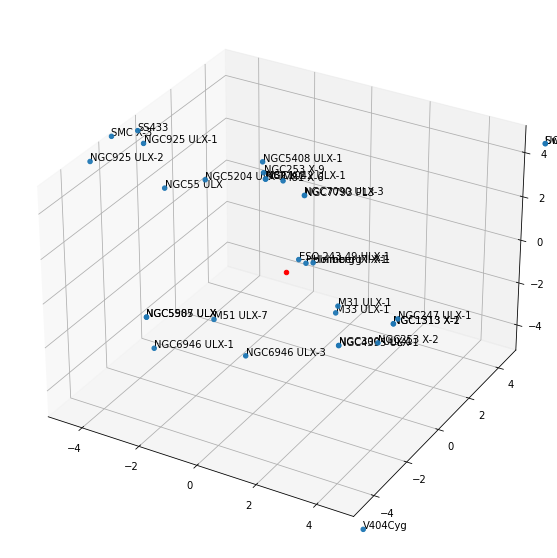

In [50]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter(x_pc, y_pc, z_pc)

for i, txt in enumerate(tab['source_name']):
    ax.text(x_pc[i], y_pc[i], z_pc[i], source_names_readable[txt])

ax.scatter(0,0,0, color='red')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)

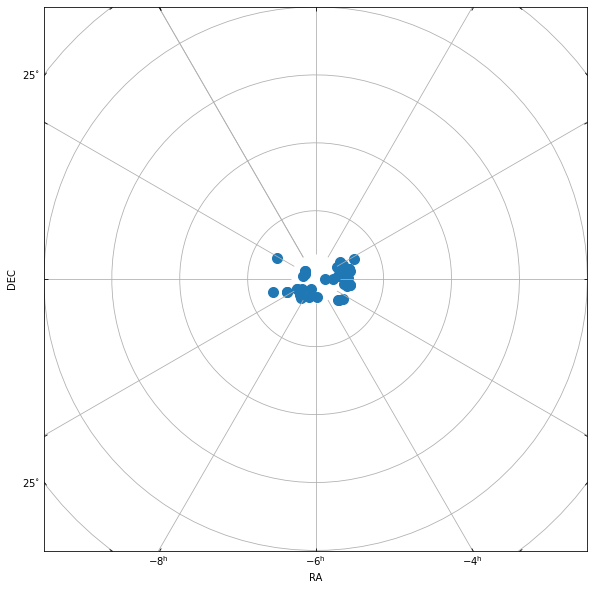

In [27]:
"""
An experimental support for curvilinear grid.
"""
import numpy as np
import  mpl_toolkits.axisartist.angle_helper as angle_helper
import matplotlib.cm as cmap
from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D
from mpl_toolkits.axisartist import SubplotHost
from mpl_toolkits.axisartist import GridHelperCurveLinear
import matplotlib.pyplot as plt


fig = plt.figure(1, figsize=(10,10))

# see demo_curvelinear_grid.py for details
tr = Affine2D().scale(np.pi/180., 1.) + PolarAxes.PolarTransform()

extreme_finder = angle_helper.ExtremeFinderCycle(10, 60,
                                                 lon_cycle = 360,
                                                 lat_cycle = None,
                                                 lon_minmax = None,
                                                 lat_minmax = (0, np.inf),
                                                 )

grid_locator1 = angle_helper.LocatorHMS(12) #changes theta gridline count
tick_formatter1 = angle_helper.FormatterHMS()

grid_locator2 = angle_helper.LocatorDMS(6)
tick_formatter2 = angle_helper.FormatterDMS()

grid_helper = GridHelperCurveLinear(tr,
                                    extreme_finder=extreme_finder,
                                    grid_locator1=grid_locator1,
                                    tick_formatter1=tick_formatter1,
                                    grid_locator2=grid_locator2,
                                    tick_formatter2=tick_formatter2
                                    )


ax1 = SubplotHost(fig, 1, 1, 1, grid_helper=grid_helper)

fig.add_subplot(ax1)


ax1.set_aspect(1.)
ax1.set_xlim(-20,20) # moves the origin left-right in ax1
ax1.set_ylim(-20,20) # moves the origin up-down



ax1.scatter(ra_rad,dec_rad, s=100)

ax1.set_ylabel('DEC')
ax1.set_xlabel('RA')
ax1.grid(True)

plt.show()